In [1]:
import os

import numpy as np
import pandas as pd
import pandas_profiling

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="ticks", color_codes=True)

In [2]:
print(os.listdir("../data/raw"))

['credit_card_balance.csv', 'application_train.csv', 'application_test.csv', 'bureau_balance.csv', 'installments_payments.csv', 'bureau.csv', 'POS_CASH_balance.csv', '.gitkeep', 'previous_application.csv']


In [3]:
appTrainDf = pd.read_csv("../data/raw/application_train.csv")

In [6]:
print('Training data shape: ', appTrainDf.shape)

Training data shape:  (307511, 122)


In [8]:
for line in appTrainDf.columns:
    print(line)

SK_ID_CURR
TARGET
NAME_CONTRACT_TYPE
CODE_GENDER
FLAG_OWN_CAR
FLAG_OWN_REALTY
CNT_CHILDREN
AMT_INCOME_TOTAL
AMT_CREDIT
AMT_ANNUITY
AMT_GOODS_PRICE
NAME_TYPE_SUITE
NAME_INCOME_TYPE
NAME_EDUCATION_TYPE
NAME_FAMILY_STATUS
NAME_HOUSING_TYPE
REGION_POPULATION_RELATIVE
DAYS_BIRTH
DAYS_EMPLOYED
DAYS_REGISTRATION
DAYS_ID_PUBLISH
OWN_CAR_AGE
FLAG_MOBIL
FLAG_EMP_PHONE
FLAG_WORK_PHONE
FLAG_CONT_MOBILE
FLAG_PHONE
FLAG_EMAIL
OCCUPATION_TYPE
CNT_FAM_MEMBERS
REGION_RATING_CLIENT
REGION_RATING_CLIENT_W_CITY
WEEKDAY_APPR_PROCESS_START
HOUR_APPR_PROCESS_START
REG_REGION_NOT_LIVE_REGION
REG_REGION_NOT_WORK_REGION
LIVE_REGION_NOT_WORK_REGION
REG_CITY_NOT_LIVE_CITY
REG_CITY_NOT_WORK_CITY
LIVE_CITY_NOT_WORK_CITY
ORGANIZATION_TYPE
EXT_SOURCE_1
EXT_SOURCE_2
EXT_SOURCE_3
APARTMENTS_AVG
BASEMENTAREA_AVG
YEARS_BEGINEXPLUATATION_AVG
YEARS_BUILD_AVG
COMMONAREA_AVG
ELEVATORS_AVG
ENTRANCES_AVG
FLOORSMAX_AVG
FLOORSMIN_AVG
LANDAREA_AVG
LIVINGAPARTMENTS_AVG
LIVINGAREA_AVG
NONLIVINGAPARTMENTS_AVG
NONLIVINGAREA_AVG
APART

In [12]:
profile = pandas_profiling.ProfileReport(appTrainDf)
profile.to_file(outputfile="../reports/appTrainDf.html")

In [13]:
appTrainDf['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

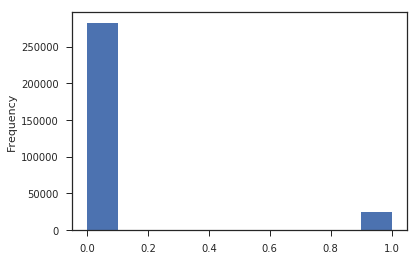

In [46]:
appTrainDf['TARGET'].astype(int).plot.hist()

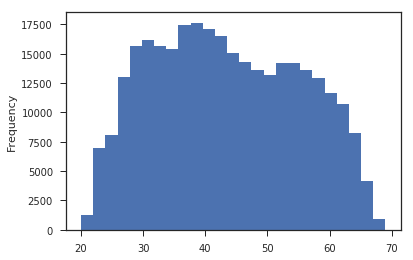

In [45]:
(appTrainDf['DAYS_BIRTH'] / -365).astype(int).plot.hist(bins = 25);

/home/rob/anaconda3/envs/hcdr/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/rob/anaconda3/envs/hcdr/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


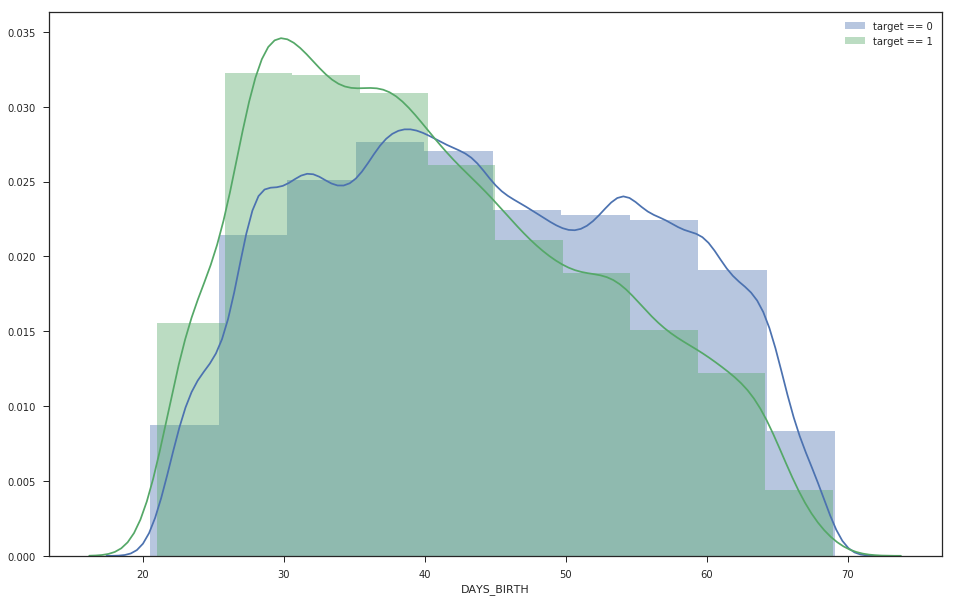

In [44]:
plt.figure(figsize = (16, 10))

sns.distplot(appTrainDf.loc[appTrainDf['TARGET'] == 0, 'DAYS_BIRTH'] / -365, label = 'target == 0', bins = 10)
sns.distplot(appTrainDf.loc[appTrainDf['TARGET'] == 1, 'DAYS_BIRTH'] / -365, label = 'target == 1', bins = 10)

plt.legend()

In [40]:
appTrainDf['YEARS_BIRTH'] = appTrainDf['DAYS_BIRTH'] / -365

/home/rob/anaconda3/envs/hcdr/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/rob/anaconda3/envs/hcdr/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


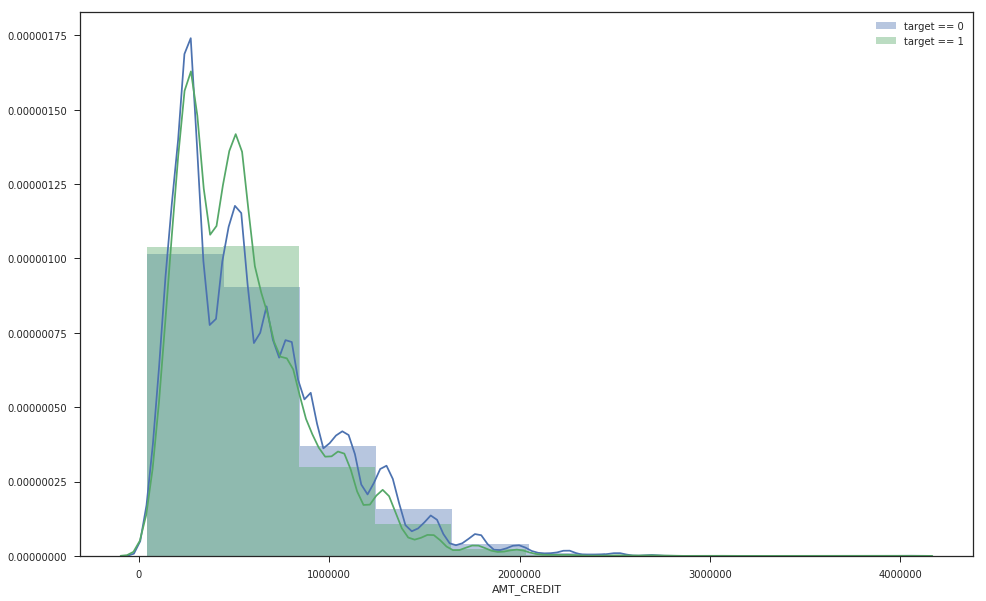

In [49]:
plt.figure(figsize = (16, 10))

sns.distplot(appTrainDf.loc[appTrainDf['TARGET'] == 0, 'AMT_CREDIT'], label = 'target == 0', bins = 10)
sns.distplot(appTrainDf.loc[appTrainDf['TARGET'] == 1, 'AMT_CREDIT'] , label = 'target == 1', bins = 10)

plt.legend()

/home/rob/anaconda3/envs/hcdr/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/rob/anaconda3/envs/hcdr/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


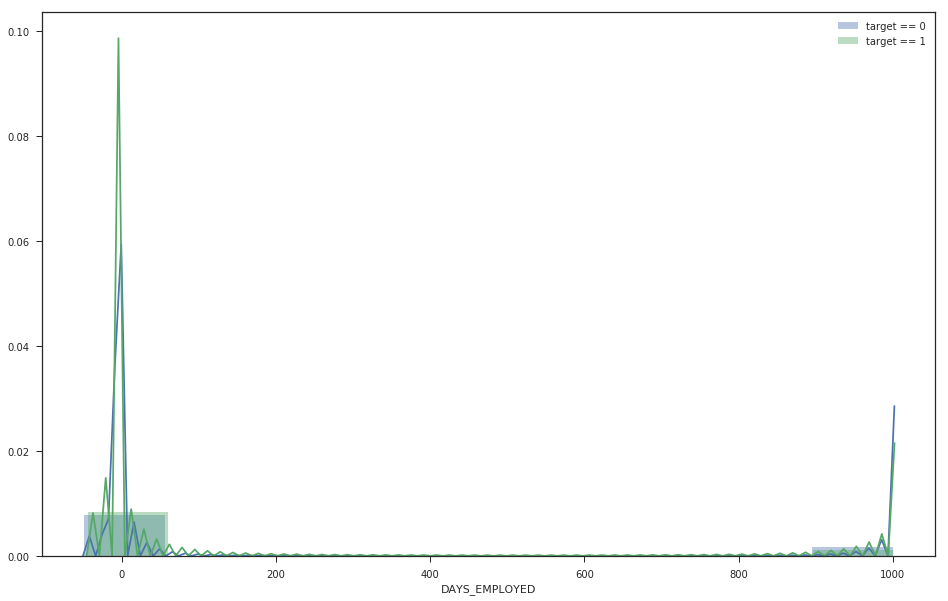

In [52]:
plt.figure(figsize = (16, 10))

sns.distplot(appTrainDf.loc[appTrainDf['TARGET'] == 0, 'DAYS_EMPLOYED']/365, label = 'target == 0', bins = 10)
sns.distplot(appTrainDf.loc[appTrainDf['TARGET'] == 1, 'DAYS_EMPLOYED']/365, label = 'target == 1', bins = 10)

plt.legend()

## Create a new df for training

In [74]:
dfTraining = pd.DataFrame(appTrainDf[['YEARS_BIRTH','TARGET']])

## One hot encoding

In [70]:
def simplifyEducation(dfIn, dfOut):
    """Update education and one hot encode them"""

    edu = pd.get_dummies(dfIn.NAME_EDUCATION_TYPE, prefix = 'EDU')
    dfOut = pd.concat([dfOut, edu], axis = 1)
    return dfOut

In [75]:
dfTraining = simplifyEducation(appTrainDf, dfTraining)

In [59]:
correlations = dfTraining.corr()['TARGET'].sort_values()

In [60]:
print(correlations)

YEARS_BIRTH                         -0.078239
EDU_Higher education                -0.056593
EDU_Academic degree                 -0.005294
EDU_Incomplete higher                0.002813
EDU_Lower secondary                  0.011747
EDU_Secondary / secondary special    0.049824
TARGET                               1.000000
Name: TARGET, dtype: float64


In [71]:
def simplifyFamily(dfIn, dfOut):
    """Update Family and one hot encode them"""

    fam = pd.get_dummies(dfIn.NAME_FAMILY_STATUS, prefix = 'FAM')
    dfOut = pd.concat([dfOut, fam], axis = 1)
    return dfOut

In [76]:
dfTraining = simplifyFamily(appTrainDf, dfTraining)

In [73]:
dfTraining.columns

Index(['YEARS_BIRTH', 'TARGET', 'FAM_Civil marriage', 'FAM_Married',
       'FAM_Separated', 'FAM_Single / not married', 'FAM_Unknown',
       'FAM_Widow'],
      dtype='object')

In [77]:
correlations = dfTraining.corr()['TARGET'].sort_values()
print(correlations)

YEARS_BIRTH                         -0.078239
EDU_Higher education                -0.056593
FAM_Married                         -0.025043
FAM_Widow                           -0.019394
EDU_Academic degree                 -0.005294
FAM_Unknown                         -0.000756
FAM_Separated                        0.001168
EDU_Incomplete higher                0.002813
EDU_Lower secondary                  0.011747
FAM_Civil marriage                   0.022496
FAM_Single / not married             0.026518
EDU_Secondary / secondary special    0.049824
TARGET                               1.000000
Name: TARGET, dtype: float64


In [78]:
def simplifyIncome(dfIn, dfOut):
    "Update Income and one hot encode them"
    
    inc = pd.get_dummies(dfIn.NAME_INCOME_TYPE, prefix = 'INC')
    dfOut = pd.concat([dfOut, inc], axis = 1)
    return dfOut

In [79]:
dfTraining = simplifyIncome(appTrainDf, dfTraining)

In [80]:
correlations = dfTraining.corr()['TARGET'].sort_values()
print(correlations)

YEARS_BIRTH                         -0.078239
EDU_Higher education                -0.056593
INC_Pensioner                       -0.046209
FAM_Married                         -0.025043
INC_State servant                   -0.023447
FAM_Widow                           -0.019394
INC_Commercial associate            -0.011906
EDU_Academic degree                 -0.005294
INC_Student                         -0.002267
INC_Businessman                     -0.001690
FAM_Unknown                         -0.000756
FAM_Separated                        0.001168
EDU_Incomplete higher                0.002813
INC_Maternity leave                  0.004726
INC_Unemployed                       0.008784
EDU_Lower secondary                  0.011747
FAM_Civil marriage                   0.022496
FAM_Single / not married             0.026518
EDU_Secondary / secondary special    0.049824
INC_Working                          0.057481
TARGET                               1.000000
Name: TARGET, dtype: float64


In [81]:
cov = dfTraining.cov()['TARGET'].sort_values()

In [82]:
print(cov)

YEARS_BIRTH                         -2.548312e-01
EDU_Higher education                -6.616375e-03
INC_Pensioner                       -4.836620e-03
FAM_Married                         -3.277043e-03
INC_State servant                   -1.635906e-03
INC_Commercial associate            -1.370869e-03
FAM_Widow                           -1.176434e-03
EDU_Academic degree                 -3.329819e-05
INC_Student                         -4.725436e-06
INC_Businessman                     -2.625242e-06
FAM_Unknown                         -5.250484e-07
INC_Maternity leave                  5.191232e-06
INC_Unemployed                       2.023988e-05
FAM_Separated                        7.801775e-05
EDU_Incomplete higher                1.377188e-04
EDU_Lower secondary                  3.542611e-04
FAM_Civil marriage                   1.812297e-03
FAM_Single / not married             2.563687e-03
EDU_Secondary / secondary special    6.157694e-03
INC_Working                          7.825314e-03


## Test out Feature Building

In [3]:
import sys
sys.path.append('../src/features')

import build_features as bf

In [4]:
appTrainDf = pd.read_csv("../data/raw/application_train.csv")

In [5]:
newdf = appTrainDf['TARGET']


In [6]:
newdf.describe()

count    307511.000000
mean          0.080729
std           0.272419
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: TARGET, dtype: float64

In [7]:
def daysToYears(dfIn, dfOut):
    """Update education and one hot encode them"""

    years = dfIn['DAYS_BIRTH'] / -365
    dfOut = pd.concat([dfOut, years], axis = 1)
    return dfOut

In [8]:
newdf = daysToYears(appTrainDf, newdf)

In [9]:
newdf.describe()

,TARGET,DAYS_BIRTH
count,307511.000000,307511.000000
mean,0.080729,43.936973
std,0.272419,11.956133
min,0.000000,20.517808
25%,0.000000,34.008219
50%,0.000000,43.150685
75%,0.000000,53.923288
max,1.000000,69.120548


In [10]:
def simplifyEducation(dfIn, dfOut):
    """Update education and one hot encode them"""

    edu = pd.get_dummies(dfIn.NAME_EDUCATION_TYPE, prefix = 'EDU')
    dfOut = pd.concat([dfOut, edu], axis = 1)
    return dfOut

In [11]:
newdf = simplifyEducation(appTrainDf, newdf)

In [12]:
newdf.describe()

,TARGET,DAYS_BIRTH,EDU_Academic degree,EDU_Higher education,EDU_Incomplete higher,EDU_Lower secondary,EDU_Secondary / secondary special
count,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,0.080729,43.936973,0.000533,0.243448,0.033420,0.012409,0.710189
std,0.272419,11.956133,0.023087,0.429164,0.179731,0.110704,0.453675
min,0.000000,20.517808,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,34.008219,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,43.150685,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,53.923288,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,69.120548,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
newdf2=bf.executeFeatures(appTrainDf)

In [14]:
newdf2.head()

,TARGET,DAYS_BIRTH,EDU_Academic degree,EDU_Higher education,EDU_Incomplete higher,EDU_Lower secondary,EDU_Secondary / secondary special,FAM_Civil marriage,FAM_Married,FAM_Separated,...,FAM_Unknown,FAM_Widow,INC_Businessman,INC_Commercial associate,INC_Maternity leave,INC_Pensioner,INC_State servant,INC_Student,INC_Unemployed,INC_Working
0,1,25.920548,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,45.931507,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
2,0,52.180822,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,52.068493,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,54.608219,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
